In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# read weight-height dataset
data = "../data/weight-height.csv"
df_weight_height = pd.read_csv(data)

In [3]:
df_weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# [문제 해결] height : inch와 weight : lb(파운드)로 되어 있음. 
# 컬럼의 모든 값을 다음의 단위로 환산하여 대입해 보세요.
# 단위를 우리에게 익숙한 값으로 변경 : inch -> 2.54 cm, lb(파운드) -> 0.4563 kg
# df_weight_height["Height"] = df_weight_height["Height"] *2.54
# df_weight_height["Weight"] = df_weight_height["Weight"]*0.4563
df_weight_height["Height"] = df_weight_height["Height"].apply(lambda x : x*2.54)
df_weight_height["Weight"] = df_weight_height["Weight"].apply(lambda x : x*0.4563)

In [5]:
df_weight_height.head()

,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [6]:
df_weight_height.shape

(10000, 3)

In [7]:
df_weight_height.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
df_weight_height.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


In [9]:
df_weight_height['Height']

0       187.571423
1       174.706036
2       188.239668
3       182.196685
4       177.499761
           ...    
9995    168.078536
9996    170.350573
9997    162.224700
9998    175.346978
9999    157.338385
Name: Height, Length: 10000, dtype: float64

/home/ubuntu/MLvenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


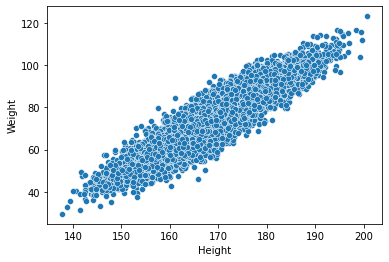

In [14]:
# 입력데이터와 정답데이터를 분리하세요.
X =  df_weight_height['Height'] # 입력데이터
y =  df_weight_height['Weight']# 정답데이터

# seaborn으로 다음의 차트가 그려보세요.
sns.scatterplot(X,y)
plt.show()

In [15]:
# 머신러닝 학습을 위해 80%는 트레이닝 데이터, 20%는 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [16]:
# 선형회귀(Linear Regression) 모델 선언하기
model_lr = LinearRegression()

In [17]:
# 선형회귀(Linear Regression) 모델 학습하기
# reshape 부분을 유의! 2차원 이상으로 넣어야함.

model_lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression()

### 테스트시 reshape(-1,1)로 차원을 바꿔 주는 이유
- [키, 성별, bmi]
-  학습기는 기본적으로 feature 2개 이상의 input이 들어간다고 가정하고 만들어뒀다.(2차원 array)
-  현재 키(height)만 있음.

In [18]:
# 테스트 데이터에 대한 예측을 수행
# 예측을 위해서도 X_test 데이터를 2차원으로 바꿔서 넣어야 함.
y_pred = model_lr.predict(X_test.values.reshape(-1,1))

In [19]:
y_pred

array([54.62057253, 74.03648913, 74.79236607, ..., 69.55052474,
       94.48834339, 74.11867572])

In [20]:
#print(type(X_test))
print(X_test.values)
print(X_test.values.reshape(-1,1))

[154.88782814 168.86709033 169.41131403 ... 165.63724166 183.59221708
 168.92626384]
[[154.88782814]
 [168.86709033]
 [169.41131403]
 ...
 [165.63724166]
 [183.59221708]
 [168.92626384]]


In [26]:
# 내 몸무게 예측해보기
my_h= pd.Series([178])
model_lr.predict(my_h.values.reshape(-1,1))

array([86.72126535])

In [27]:
y_test

8302    49.494482
2050    77.393715
9688    65.535881
7668    72.939474
929     69.731980
          ...    
4137    94.299391
9264    60.372146
7482    67.986114
1145    87.925141
8144    69.558691
Name: Weight, Length: 2000, dtype: float64

In [ ]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test,y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 29.51108372623765
RMSE : 5.43241048948233


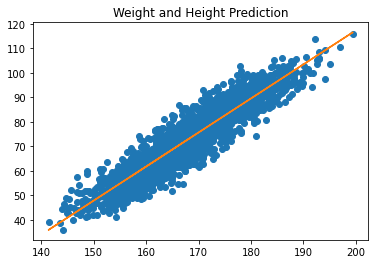

In [ ]:
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()